All the existing models in Brain-Score have their layers committed to certain cortical regions, e.g. such that the output of block 42 in a transformer corresponds to neural activity in the human language system.

In some cases, testing individual layers of a base model is desirable, e.g. in exploratory analyses of hierarchical correspondences, or to commit layers of a new model to cortical regions.
Note however, that ultimately all models submitted to Brain-Score must declare neural commitments, so that always the same model units are used to compare against a particular cortical brain region.


This example uses the HuggingfaceSubject wrapper which allows us to easily access base models, and allows to specify a mapping of regions to layers in the constructor.

Let's first create a model without a layer commitment:

In [1]:
from brainscore_language.model_helpers.huggingface import HuggingfaceSubject
from brainscore_language import ArtificialSubject

model_identifier = 'distilgpt2'

model = HuggingfaceSubject(model_id=model_identifier, region_layer_mapping={})

# from brainscore_language import load_model
# model = load_model(model_identifier)


/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/brainscore_core/metrics/__init__.py:16: FutureWarning: xarray subclass Score should explicitly define __slots__
  class Score(DataAssembly):


The `distilgpt2` model consists of 6 transformer blocks:

In [2]:
print(model.basemodel)

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-5): 6 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)


In [3]:
from tqdm import tqdm
from brainio.assemblies import merge_data_arrays
from brainscore_language import load_benchmark

benchmark = load_benchmark('Willett2023-linear')

layer_scores = []

AssertionError: No registrations found for Willett2023-linear

In [16]:
from brainscore_language import score

#model_score = score(model_identifier=model_identifier, benchmark_identifier='Pereira2018.243sentences-linear')
#print(model_score)

In [17]:

for layer in tqdm([f'transformer.h.{block}.ln_1' for block in range(36)], desc='layers'):
    print(layer)
    layer_model = HuggingfaceSubject(model_id=model_identifier, region_layer_mapping={
        ArtificialSubject.RecordingTarget.language_system: layer})
    #print(layer_model.basemodel)
    layer_score = benchmark(layer_model)
    # package for xarray
    layer_score = layer_score.expand_dims('layer')
    layer_score['layer'] = [layer]
    layer_scores.append(layer_score)
layer_scores = merge_data_arrays(layer_scores)
print(layer_scores)

layers:   0%|                                            | 0/36 [00:00<?, ?it/s]

transformer.h.0.ln_1


/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-e

transformer.h.1.ln_1


/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-e

transformer.h.2.ln_1


/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-e

transformer.h.3.ln_1


/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-e

transformer.h.4.ln_1


/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-e

transformer.h.5.ln_1


/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-e

transformer.h.6.ln_1


/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-e

transformer.h.7.ln_1


/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-e

transformer.h.8.ln_1


/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-e

transformer.h.9.ln_1


/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-e

transformer.h.10.ln_1


/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-e

transformer.h.11.ln_1


/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-e

transformer.h.12.ln_1


/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-e

transformer.h.13.ln_1


/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-e

transformer.h.14.ln_1


/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-e

transformer.h.15.ln_1


/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-e

transformer.h.16.ln_1


/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-e

transformer.h.17.ln_1


/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-e

transformer.h.18.ln_1


/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-e

transformer.h.19.ln_1


/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-e

transformer.h.20.ln_1


/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-e

transformer.h.21.ln_1


/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-e

transformer.h.22.ln_1


/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-e

transformer.h.23.ln_1


/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-e

transformer.h.24.ln_1


/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-e

transformer.h.25.ln_1


/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-e

transformer.h.26.ln_1


/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-e

transformer.h.27.ln_1


/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-e

transformer.h.28.ln_1


/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-e

transformer.h.29.ln_1


/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-e

transformer.h.30.ln_1


/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-e

transformer.h.31.ln_1


/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-e

transformer.h.32.ln_1


/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-e

transformer.h.33.ln_1


/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-e

transformer.h.34.ln_1


/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-e

transformer.h.35.ln_1


/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/hadarla/miniconda3/envs/brain-score-e

<xarray.Score (layer: 36)>
array([0.        , 0.72697292, 0.8006151 , 0.79781761, 0.74720273,
       0.78061529, 0.73315904, 0.74791536, 0.74114379, 0.75273529,
       0.81114058, 0.79273044, 0.80377737, 0.81573941, 0.78974996,
       0.79725827, 0.81914051, 0.82147154, 0.82049647, 0.82361469,
       0.86213005, 0.87509879, 0.89475476, 0.85913664, 0.88773579,
       0.91827951, 0.91602535, 0.90255727, 0.91065293, 0.91728556,
       0.859685  , 0.85093885, 0.77694178, 0.78103636, 0.81123169,
       0.77206621])
Coordinates:
  * layer    (layer) <U21 'transformer.h.0.ln_1' ... 'transformer.h.9.ln_1'
Attributes:
    raw:                          <xarray.Score (layer: 1)>\narray([-0.015056...
    ceiling:                      <xarray.Score 'data' ()>\narray(0.35378928)...
    original_out_of_range_score:  -0.04255848326645667


By creating new artificial subject models, we can test each block separately (note that here we choose to test the first LayerNorm `ln_1` for each block, but you can specify other modules):

In [19]:
layer_names = []
for layer in tqdm([f'transformer.h.{block}.ln_1' for block in range(36)], desc='layers'):
    layer_names.append(layer)

print(layer_names)
    

layers: 100%|███████████████████████████████| 36/36 [00:00<00:00, 578524.69it/s]

['transformer.h.0.ln_1', 'transformer.h.1.ln_1', 'transformer.h.2.ln_1', 'transformer.h.3.ln_1', 'transformer.h.4.ln_1', 'transformer.h.5.ln_1', 'transformer.h.6.ln_1', 'transformer.h.7.ln_1', 'transformer.h.8.ln_1', 'transformer.h.9.ln_1', 'transformer.h.10.ln_1', 'transformer.h.11.ln_1', 'transformer.h.12.ln_1', 'transformer.h.13.ln_1', 'transformer.h.14.ln_1', 'transformer.h.15.ln_1', 'transformer.h.16.ln_1', 'transformer.h.17.ln_1', 'transformer.h.18.ln_1', 'transformer.h.19.ln_1', 'transformer.h.20.ln_1', 'transformer.h.21.ln_1', 'transformer.h.22.ln_1', 'transformer.h.23.ln_1', 'transformer.h.24.ln_1', 'transformer.h.25.ln_1', 'transformer.h.26.ln_1', 'transformer.h.27.ln_1', 'transformer.h.28.ln_1', 'transformer.h.29.ln_1', 'transformer.h.30.ln_1', 'transformer.h.31.ln_1', 'transformer.h.32.ln_1', 'transformer.h.33.ln_1', 'transformer.h.34.ln_1', 'transformer.h.35.ln_1']


In [52]:
layer_scores_ordered = []
for layer in layer_names:
    layer_scores_ordered.append(layer_scores.sel(layer=layer).data)

print(layer_scores_ordered)

[array(0.), array(0.72697292), array(0.80377737), array(0.85913664), array(0.859685), array(0.85093885), array(0.77694178), array(0.78103636), array(0.81123169), array(0.77206621), array(0.8006151), array(0.79781761), array(0.74720273), array(0.78061529), array(0.73315904), array(0.74791536), array(0.74114379), array(0.75273529), array(0.81114058), array(0.79273044), array(0.81573941), array(0.78974996), array(0.79725827), array(0.81914051), array(0.82147154), array(0.82049647), array(0.82361469), array(0.86213005), array(0.87509879), array(0.89475476), array(0.88773579), array(0.91827951), array(0.91602535), array(0.90255727), array(0.91065293), array(0.91728556)]


In [58]:
layer_scores_ordered[10]

array(0.8006151)

In [57]:
layer_scores

<xarray.Score (layer: 36)>
array([0.        , 0.72697292, 0.8006151 , 0.79781761, 0.74720273,
       0.78061529, 0.73315904, 0.74791536, 0.74114379, 0.75273529,
       0.81114058, 0.79273044, 0.80377737, 0.81573941, 0.78974996,
       0.79725827, 0.81914051, 0.82147154, 0.82049647, 0.82361469,
       0.86213005, 0.87509879, 0.89475476, 0.85913664, 0.88773579,
       0.91827951, 0.91602535, 0.90255727, 0.91065293, 0.91728556,
       0.859685  , 0.85093885, 0.77694178, 0.78103636, 0.81123169,
       0.77206621])
Coordinates:
  * layer    (layer) <U21 'transformer.h.0.ln_1' ... 'transformer.h.9.ln_1'
Attributes:
    raw:                          <xarray.Score (layer: 1)>\narray([-0.015056...
    ceiling:                      <xarray.Score 'data' ()>\narray(0.35378928)...
    original_out_of_range_score:  -0.04255848326645667

In [20]:
layer_scores['layer'].values

array(['transformer.h.0.ln_1', 'transformer.h.1.ln_1',
       'transformer.h.10.ln_1', 'transformer.h.11.ln_1',
       'transformer.h.12.ln_1', 'transformer.h.13.ln_1',
       'transformer.h.14.ln_1', 'transformer.h.15.ln_1',
       'transformer.h.16.ln_1', 'transformer.h.17.ln_1',
       'transformer.h.18.ln_1', 'transformer.h.19.ln_1',
       'transformer.h.2.ln_1', 'transformer.h.20.ln_1',
       'transformer.h.21.ln_1', 'transformer.h.22.ln_1',
       'transformer.h.23.ln_1', 'transformer.h.24.ln_1',
       'transformer.h.25.ln_1', 'transformer.h.26.ln_1',
       'transformer.h.27.ln_1', 'transformer.h.28.ln_1',
       'transformer.h.29.ln_1', 'transformer.h.3.ln_1',
       'transformer.h.30.ln_1', 'transformer.h.31.ln_1',
       'transformer.h.32.ln_1', 'transformer.h.33.ln_1',
       'transformer.h.34.ln_1', 'transformer.h.35.ln_1',
       'transformer.h.4.ln_1', 'transformer.h.5.ln_1',
       'transformer.h.6.ln_1', 'transformer.h.7.ln_1',
       'transformer.h.8.ln_1', 'transfo

Text(0, 0.5, 'score')

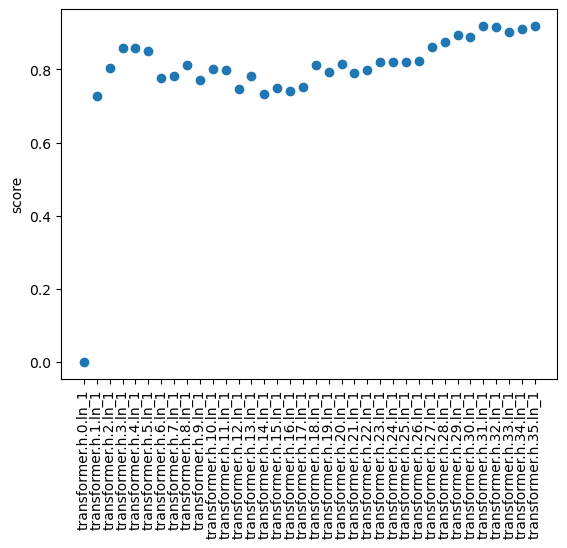

In [63]:
import numpy as np
from matplotlib import pyplot

fig, ax = pyplot.subplots()
x = np.arange(len(layer_scores_ordered))
ax.scatter(x, layer_scores_ordered)
ax.set_xticks(x)
ax.set_xticklabels(layer_names, rotation=90)
ax.set_ylabel('score')
